In [54]:
import numpy as np
import pandas as pd
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [45]:
api_url="http://127.0.0.1:5000/api/iris"
data = requests.get(api_url).json()
data = pd.DataFrame(data)  
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [46]:
X=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data['species']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
print("X shape",x.shape)
print("y shape",y.shape)
print(data.isnull().sum())


X shape (150, 4)
y shape (150,)
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [52]:
conf_report=classification_report(y_test,y_pred)
print("Classification Report:\n",conf_report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


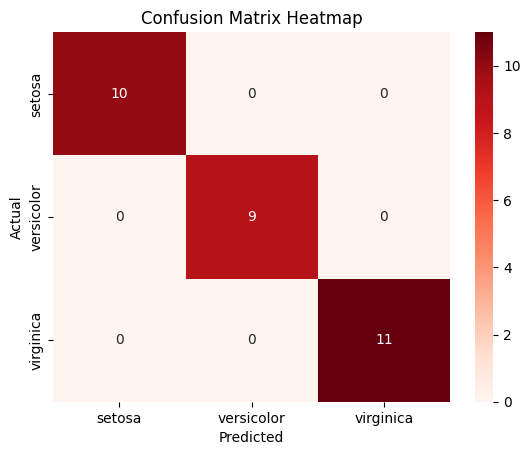

In [70]:
conf_matris=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",conf_matris)

plt.Figure(figsize=(8,6))
sns.heatmap(conf_matris, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

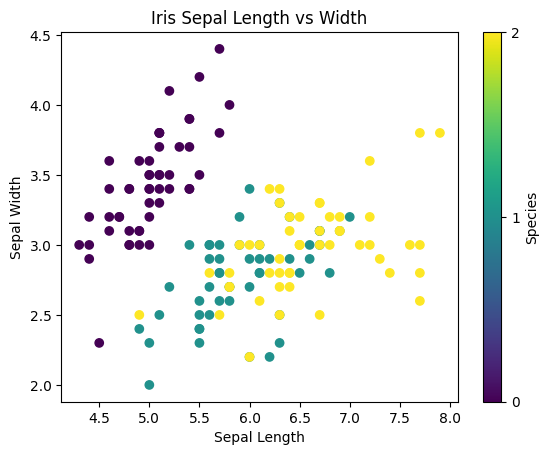

In [67]:
plt.Figure(figsize=(8,6))
plt.scatter(data['sepal_length'], data['sepal_width'], c=pd.Categorical(data['species']).codes, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Sepal Length vs Width')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.show()

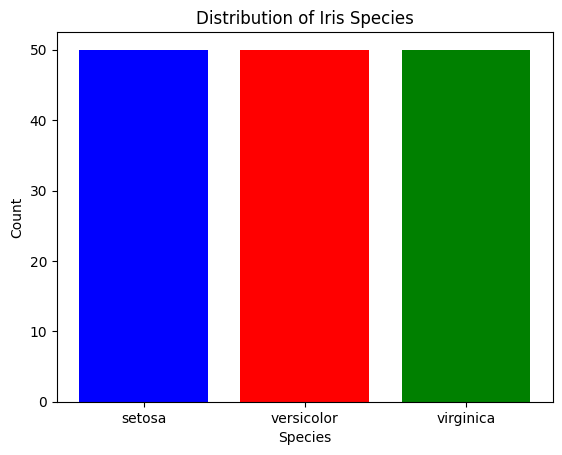

In [69]:
plt.Figure(figsize=(8,6))
plt.bar(data['species'].value_counts().index, data['species'].value_counts().values, color=['blue', 'red', 'green'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Iris Species')
plt.show()

In [66]:
# Yeni örnekler
new_samples = [
    [5.0, 3.4, 1.5, 0.2],  # Muhtemelen setosa
    [6.5, 2.8, 4.6, 1.5],  # Muhtemelen versicolor
    [7.2, 3.0, 5.8, 2.1],  # Muhtemelen virginica
    [5.9, 3.0, 4.2, 1.5],  # Karışık, model tahmin edecek
    [5.4, 3.9, 1.7, 0.4]   # Muhtemelen setosa
]
peridicion=knn.predict(new_samples)

for i, sample in enumerate(new_samples):
    print(f"Sample {i+1} ({sample}) predicted as: {peridicion[i]}")

Sample 1 ([5.0, 3.4, 1.5, 0.2]) predicted as: setosa
Sample 2 ([6.5, 2.8, 4.6, 1.5]) predicted as: versicolor
Sample 3 ([7.2, 3.0, 5.8, 2.1]) predicted as: virginica
Sample 4 ([5.9, 3.0, 4.2, 1.5]) predicted as: versicolor
Sample 5 ([5.4, 3.9, 1.7, 0.4]) predicted as: setosa


c:\programlamapratik\machine_learninig\machine_learn\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
